In [ ]:
!pip install mplcyberpunk

In [5]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications import ResNet101,ResNet50,ResNet152
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import os
import mplcyberpunk
%matplotlib inline


In [6]:
train_path = '/content/drive/MyDrive/Maskdetectiondataset/train'
valid_path = '/content/drive/MyDrive/Maskdetectiondataset/valid'

In [7]:
resnet_50 = ResNet50(include_top=False,weights='imagenet',input_shape=[224,224,3])


94773248/94765736 [==============================] - 3s 0us/step


In [8]:
for i in resnet_50.layers:
  i.trainable = False

In [9]:
train_len = glob('/content/drive/MyDrive/Maskdetectiondataset/train/*')
len(train_len)

2

In [10]:
x = Flatten()(resnet_50.output)
prediction_resnet = Dense(len(train_len),activation='softmax')(x)

model_resnet = Model(inputs = resnet_50.input,outputs = prediction_resnet)

In [11]:
model_resnet.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [13]:
model_resnet.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 32)

testing_set = test_datagen.flow_from_directory(valid_path,
                                               target_size = (224,224),
                                               class_mode = 'categorical',
                                               batch_size = 32)



Found 1564 images belonging to 2 classes.
Found 806 images belonging to 2 classes.


In [16]:
def showimg(images_arr):
  fig,axes = plt.subplots(1,5,figsize = (20,20))
  axes = axes.flatten()

  for img,ax in zip(images_arr,axes):
    ax.imshow(img)

  plt.tight_layout()
  plt.show()

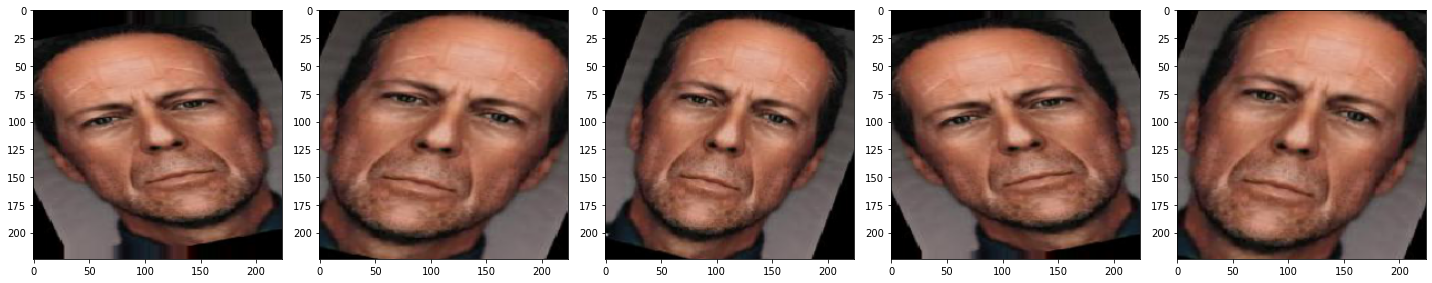

In [17]:
training_image = [training_set[0][0][0] for i in range(5)]
showimg(training_image)

In [18]:
resnet_50_hist = model_resnet.fit_generator(training_set,
                                            epochs = 10,
                                            steps_per_epoch = len(training_set),
                                            validation_data = testing_set,
                                            validation_steps = len(testing_set))


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
33/49 [===================>..........] - ETA: 6:30 - loss: 2.7287 - accuracy: 0.5900

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 1720s 35s/step - loss: 2.1362 - accuracy: 0.6164 - val_loss: 0.7169 - val_accuracy: 0.6042
Epoch 2/10
49/49 [==============================] - 29s 591ms/step - loss: 0.6851 - accuracy: 0.7008 - val_loss: 0.8955 - val_accuracy: 0.5893
Epoch 3/10
49/49 [==============================] - 29s 584ms/step - loss: 0.5573 - accuracy: 0.7391 - val_loss: 0.6016 - val_accuracy: 0.6464
Epoch 4/10
49/49 [==============================] - 28s 579ms/step - loss: 0.6952 - accuracy: 0.7116 - val_loss: 0.6467 - val_accuracy: 0.6576
Epoch 5/10
49/49 [==============================] - 29s 586ms/step - loss: 0.4479 - accuracy: 0.7935 - val_loss: 0.5906 - val_accuracy: 0.6725
Epoch 6/10
49/49 [==============================] - 28s 581ms/step - loss: 0.5478 - accuracy: 0.7615 - val_loss: 0.7253 - val_accuracy: 0.6315
Epoch 7/10
49/49 [==============================] - 29s 593ms/step - loss: 0.3817 - accuracy: 0.8344 - val_loss: 0.4031 - val_accuracy: 0.8462
Epoch 8/10

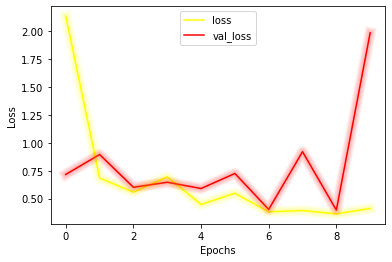

In [19]:
plt.plot(resnet_50_hist.history['loss'],label = 'loss',color = 'yellow')
plt.plot(resnet_50_hist.history['val_loss'],label = 'val_loss',color = 'red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
mplcyberpunk.make_lines_glow()
plt.show()

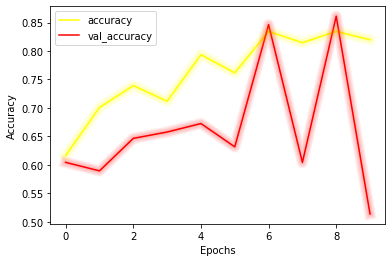

In [20]:
plt.plot(resnet_50_hist.history['accuracy'],label = 'accuracy',color = 'yellow')
plt.plot(resnet_50_hist.history['val_accuracy'],label = 'val_accuracy',color = 'red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
mplcyberpunk.make_lines_glow()
plt.show()

In [21]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

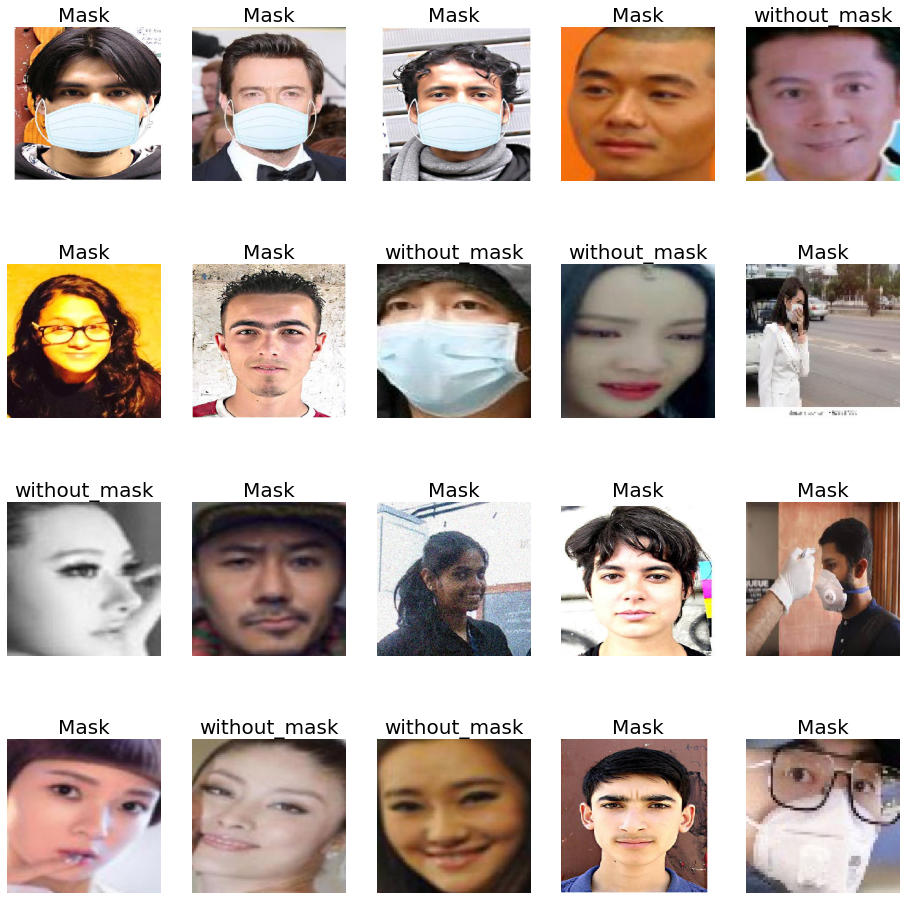

In [22]:
folder_path = '/content/drive/MyDrive/Maskdetectiondataset/test'

image_list = os.listdir(folder_path)

image_list = image_list[:20]

fig = plt.figure(figsize = (16,16))

row = 4
col = 5

j = 0

for i in image_list:
  j+=1
  image1 = load_img(folder_path + '/' + i,target_size = (224,224))
  image_data = image.img_to_array(image1)
  image_data = np.expand_dims(image_data,axis = 0)

  label = model_resnet.predict(image_data)

  if label[0][0]==1:
    k = 'Mask'
  else:
    k = 'without_mask'

  fig.add_subplot(row,col,j)
  fig.subplots_adjust(hspace = .5)
  plt.imshow(image1)
  plt.title(k,fontsize = 20)
  plt.axis('off')

plt.show()

## RESNET-152 Model

In [23]:
resnet_152 = ResNet152(include_top = False,weights = 'imagenet',input_shape = [224,224,3])


234700800/234698864 [==============================] - 13s 0us/step


In [24]:
for i in resnet_152.layers:
  i.trainable = False



In [26]:
x = Flatten()(resnet_152.output)
prediction_152 = Dense(len(train_len),activation =  'softmax')(x)
resnet_152_model = Model(inputs = resnet_152.input,outputs = prediction_152)

In [27]:
resnet_152_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [28]:
resnet_152_model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [29]:
resnet_152_model_hist = resnet_152_model.fit_generator(training_set,
                                                       epochs = 10,
                                                       steps_per_epoch = len(training_set),
                                                       validation_data = testing_set,
                                                       validation_steps = len(testing_set))

Epoch 1/10
42/49 [========================>.....] - ETA: 3s - loss: 2.1896 - accuracy: 0.5863

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 33s 682ms/step - loss: 2.0662 - accuracy: 0.5934 - val_loss: 0.9802 - val_accuracy: 0.5794
Epoch 2/10
49/49 [==============================] - 31s 639ms/step - loss: 0.6153 - accuracy: 0.7410 - val_loss: 0.5795 - val_accuracy: 0.7208
Epoch 3/10
49/49 [==============================] - 31s 634ms/step - loss: 0.5498 - accuracy: 0.7506 - val_loss: 0.5252 - val_accuracy: 0.7643
Epoch 4/10
49/49 [==============================] - 31s 637ms/step - loss: 0.4957 - accuracy: 0.7839 - val_loss: 0.5358 - val_accuracy: 0.7233
Epoch 5/10
49/49 [==============================] - 31s 631ms/step - loss: 0.4137 - accuracy: 0.8133 - val_loss: 0.4587 - val_accuracy: 0.7779
Epoch 6/10
49/49 [==============================] - 31s 631ms/step - loss: 0.4513 - accuracy: 0.7807 - val_loss: 0.4753 - val_accuracy: 0.8015
Epoch 7/10
49/49 [==============================] - 31s 629ms/step - loss: 0.6354 - accuracy: 0.7538 - val_loss: 0.4702 - val_accuracy: 0.7990
Epoch 8/10

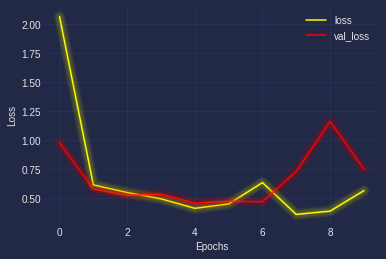

In [32]:
plt.style.use('cyberpunk')
plt.plot(resnet_152_model_hist.history['loss'],label = 'loss',color = 'yellow')
plt.plot(resnet_152_model_hist.history['val_loss'],label = 'val_loss',color = 'red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
mplcyberpunk.make_lines_glow()
plt.show()

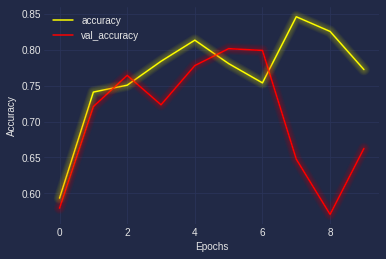

In [33]:
plt.style.use('cyberpunk')
plt.plot(resnet_152_model_hist.history['accuracy'],label = 'accuracy',color = 'yellow')
plt.plot(resnet_152_model_hist.history['val_accuracy'],label = 'val_accuracy',color = 'red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
mplcyberpunk.make_lines_glow()
plt.show()

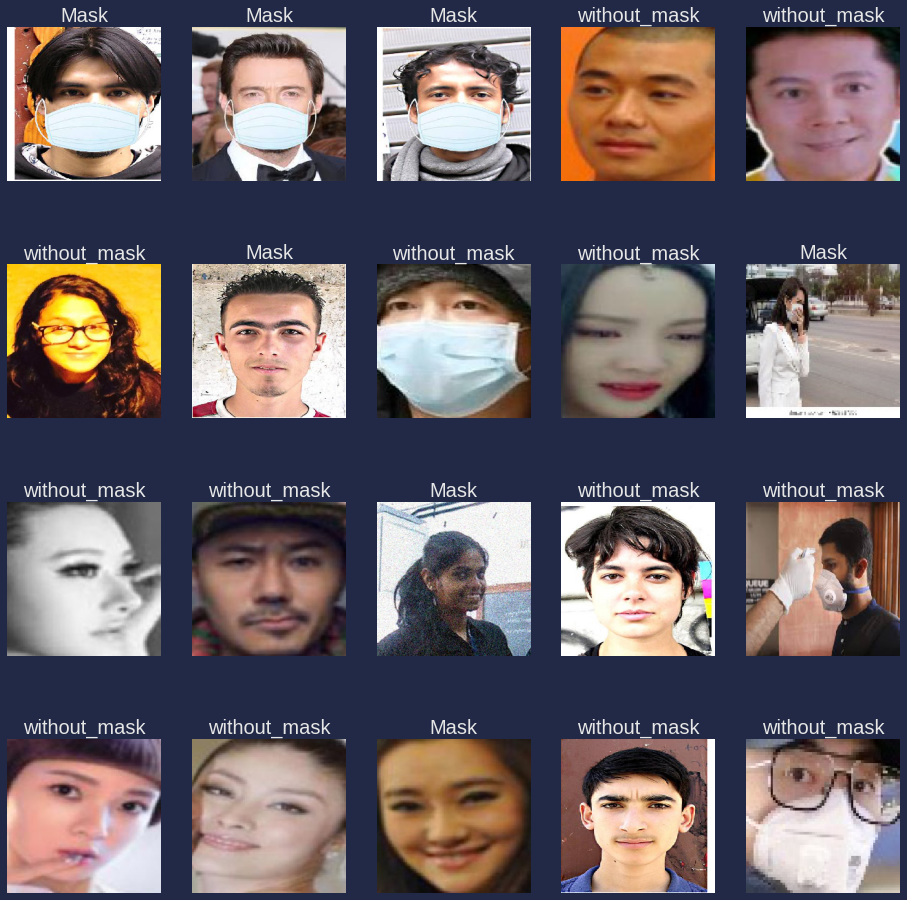

In [34]:
folder_path = '/content/drive/MyDrive/Maskdetectiondataset/test'

image_list = os.listdir(folder_path)

image_list = image_list[:20]

fig = plt.figure(figsize = (16,16))

row = 4
col = 5

j = 0

for i in image_list:
  j+=1
  image1 = load_img(folder_path + '/' + i,target_size = (224,224))
  image_data = image.img_to_array(image1)
  image_data = np.expand_dims(image_data,axis = 0)

  label = resnet_152_model.predict(image_data)

  if label[0][0]==1:
    k = 'Mask'
  else:
    k = 'without_mask'

  fig.add_subplot(row,col,j)
  fig.subplots_adjust(hspace = .5)
  plt.imshow(image1)
  plt.title(k,fontsize = 20)
  plt.axis('off')

plt.show()

## Inception Model

In [35]:
from tensorflow.keras.applications import InceptionV3

In [36]:
inception = InceptionV3(include_top = False,weights = 'imagenet',
                        input_shape = [229,229,3])


87916544/87910968 [==============================] - 2s 0us/step


In [37]:
for i in inception.layers:
  i.trainable = False

In [50]:
x = Flatten()(inception.output)
prediction = Dense(len(train_len),activation = 'softmax')(x)
inception_model = Model(inputs = inception.input,outputs = prediction)

In [51]:
inception_model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 229, 229, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 114, 114, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 114, 114, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 114, 114, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [52]:
inception_model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',
                        metrics = ['accuracy'])


In [53]:
training_set1 = train_datagen.flow_from_directory(train_path,
                                                 target_size = (229,229),
                                                 class_mode = 'categorical',
                                                 batch_size = 32)

testing_set1 = test_datagen.flow_from_directory(valid_path,
                                               target_size = (229,229),
                                               class_mode = 'categorical',
                                               batch_size = 32)



Found 1564 images belonging to 2 classes.
Found 806 images belonging to 2 classes.


In [54]:
inception_hist = inception_model.fit_generator(training_set1,
                                                       epochs = 10,
                                                       steps_per_epoch = len(training_set1),
                                                       validation_data = testing_set1,
                                                       validation_steps = len(testing_set1))

Epoch 1/10
10/49 [=====>........................] - ETA: 22s - loss: 1.5274 - accuracy: 0.8323

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 31s 635ms/step - loss: 0.5631 - accuracy: 0.9399 - val_loss: 0.1167 - val_accuracy: 0.9876
Epoch 2/10
49/49 [==============================] - 29s 599ms/step - loss: 0.1452 - accuracy: 0.9872 - val_loss: 0.1106 - val_accuracy: 0.9901
Epoch 3/10
49/49 [==============================] - 29s 598ms/step - loss: 0.0824 - accuracy: 0.9923 - val_loss: 0.1380 - val_accuracy: 0.9864
Epoch 4/10
49/49 [==============================] - 30s 607ms/step - loss: 0.1369 - accuracy: 0.9891 - val_loss: 0.1225 - val_accuracy: 0.9926
Epoch 5/10
49/49 [==============================] - 30s 602ms/step - loss: 0.0773 - accuracy: 0.9936 - val_loss: 0.0680 - val_accuracy: 0.9913
Epoch 6/10
49/49 [==============================] - 30s 607ms/step - loss: 0.0300 - accuracy: 0.9955 - val_loss: 0.0817 - val_accuracy: 0.9950
Epoch 7/10
49/49 [==============================] - 30s 616ms/step - loss: 0.0288 - accuracy: 0.9968 - val_loss: 0.0764 - val_accuracy: 0.9876
Epoch 8/10

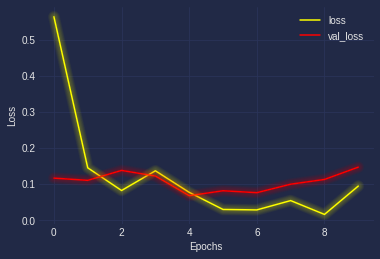

In [55]:
plt.style.use('cyberpunk')
plt.plot(inception_hist.history['loss'],label = 'loss',color = 'yellow')
plt.plot(inception_hist.history['val_loss'],label = 'val_loss',color = 'red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
mplcyberpunk.make_lines_glow()
plt.show()

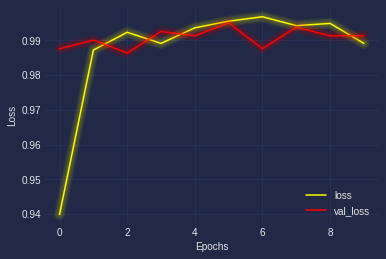

In [56]:
plt.style.use('cyberpunk')
plt.plot(inception_hist.history['accuracy'],label = 'loss',color = 'yellow')
plt.plot(inception_hist.history['val_accuracy'],label = 'val_loss',color = 'red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
mplcyberpunk.make_lines_glow()
plt.show()

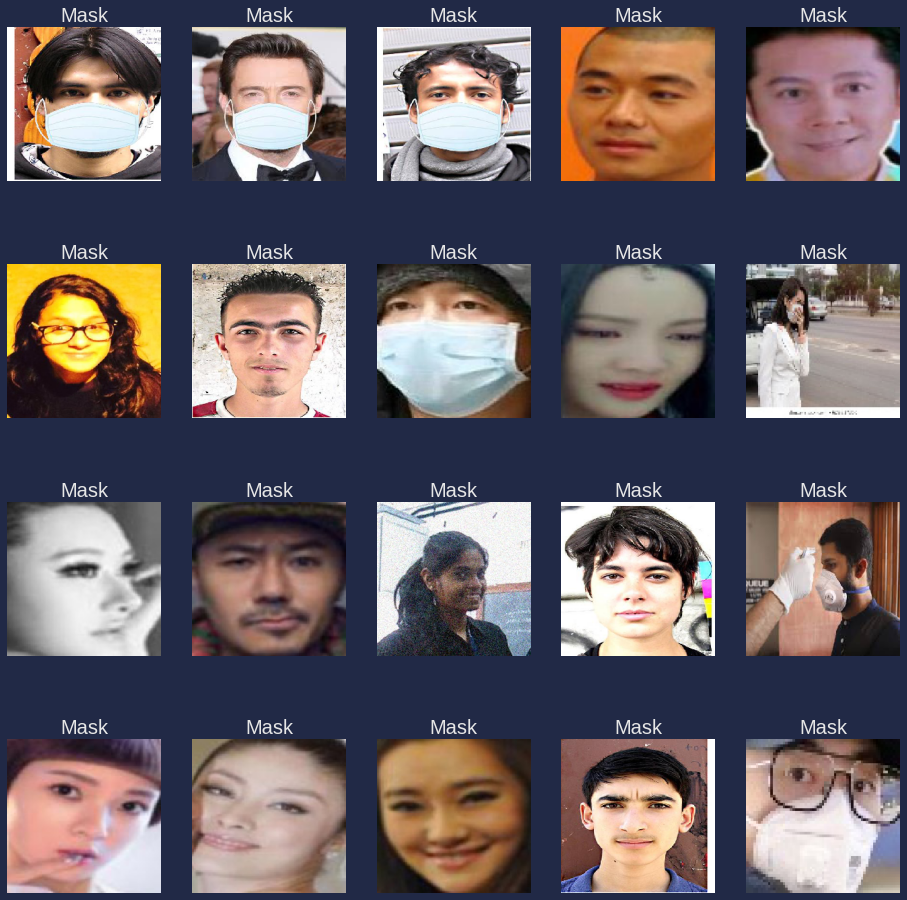

In [57]:
folder_path = '/content/drive/MyDrive/Maskdetectiondataset/test'

image_list = os.listdir(folder_path)

image_list = image_list[:20]

fig = plt.figure(figsize = (16,16))

row = 4
col = 5

j = 0

for i in image_list:
  j+=1
  image1 = load_img(folder_path + '/' + i,target_size = (229,229))
  image_data = image.img_to_array(image1)
  image_data = np.expand_dims(image_data,axis = 0)

  label = inception_model.predict(image_data)

  if label[0][0]==1:
    k = 'Mask'
  else:
    k = 'without_mask'

  fig.add_subplot(row,col,j)
  fig.subplots_adjust(hspace = .5)
  plt.imshow(image1)
  plt.title(k,fontsize = 20)
  plt.axis('off')

plt.show()